In [55]:
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
data_path = '/content/drive/MyDrive/bank loan analysis/financial_loan.csv'
df = pd.read_csv(data_path)
df.head()


,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [57]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [58]:
df.issue_date.head()

,issue_date
0,11-02-2021
1,01-01-2021
2,05-01-2021
3,25-02-2021
4,01-01-2021


In [59]:
# Converting date fields to datetime format (handling day-month-year)
date_cols = ['issue_date', 'last_credit_pull_date', 'last_payment_date','next_payment_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%d-%m-%Y', errors='coerce')

In [60]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [61]:
# Standardize and extract numeric years from employment length
clean_map = {'< 1 year': '0 years', '10+ years': '10 years'}
df['emp_length'] = df['emp_length'].replace(clean_map)
df['emp_length'] = df['emp_length'].str.extract(r'(\d+)').astype(float)

In [62]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,0.0,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9.0,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4.0,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,0.0,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10.0,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [63]:
df.next_payment_date.head()

,next_payment_date
0,2021-05-13
1,2021-02-15
2,2021-02-09
3,2021-04-12
4,2021-02-15


In [64]:
missing_values = df.isnull().sum()

In [65]:
missing_values

,0
id,0
address_state,0
application_type,0
emp_length,0
emp_title,1438
grade,0
home_ownership,0
issue_date,0
last_credit_pull_date,0
last_payment_date,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  float64       
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [67]:
total_loan_applications = df.shape[0]
print("total_loan_applications :- ",total_loan_applications)

total_loan_applications :-  38576


In [68]:
# i am commenting out this line because in every new session of colab this will create a new file from cleaned data frame

# df.to_csv("/content/drive/MyDrive/bank loan analysis/financial_loan_cleaned.csv", index=False)

**MTD/PMTD Loan Applications + MoM % Change**

In [69]:
# Filtering December and November data using `.dt.month` and assign them clearly
december_df = df[df['issue_date'].dt.month == 12]
november_df = df[df['issue_date'].dt.month == 11]

# Calculating application counts
dec_apps = len(december_df)
nov_apps = len(november_df)

# Computing MoM % change safely
app_mom_change = round(((dec_apps - nov_apps) / nov_apps) * 100, 1) if nov_apps else None

print("December Applications : ",dec_apps)
print("Novemmber Applications : ",nov_apps)
print("MoM % change in Applications : ",app_mom_change)


December Applications :  4314
Novemmber Applications :  4035
MoM % change in Applications :  6.9


**MTD/PMTD Funded Amount + MoM % Change**

In [70]:
# Funded amount sums
dec_funded = december_df['loan_amount'].sum()
nov_funded = november_df['loan_amount'].sum()

# Percent change
funded_mom_change = round(((dec_funded - nov_funded) / nov_funded) * 100, 1) if nov_funded else None

# Converting to normal python from Numpy
print("December Funded Amount      :", int(dec_funded))
print("November Funded Amount      :", int(nov_funded))
print("MoM % Change in Funded Amt  :", float(funded_mom_change) if funded_mom_change is not None else "N/A")

December Funded Amount      : 53981425
November Funded Amount      : 47754825
MoM % Change in Funded Amt  : 13.0


**MTD/PMTD Total Amount Received + MoM % Change**

In [71]:
# Received payments
dec_received = december_df['total_payment'].sum()
nov_received = november_df['total_payment'].sum()

# MoM % change
received_mom_change = round(((dec_received - nov_received) / nov_received) * 100, 1) if nov_received else None

# 2. Total Amount Received
print("\nDecember Total Received     :", int(dec_received))
print("November Total Received     :", int(nov_received))
print("MoM % Change in Received Amt:", float(received_mom_change) if received_mom_change is not None else "N/A")


December Total Received     : 58074380
November Total Received     : 50132030
MoM % Change in Received Amt: 15.8


**Interest Rate Overall, Dec, Nov + MoM %**

In [72]:
# Mean interest rates in percent
avg_int_all = df['int_rate'].mean() * 100
avg_int_dec = december_df['int_rate'].mean() * 100
avg_int_nov = november_df['int_rate'].mean() * 100

# MoM interest rate change
int_rate_mom_change = round(((avg_int_dec - avg_int_nov) / avg_int_nov) * 100, 1) if avg_int_nov else None

print("\nOverall Avg. Interest Rate  :", round(float(avg_int_all), 2))
print("December Avg. Interest Rate :", round(float(avg_int_dec), 2))
print("November Avg. Interest Rate :", round(float(avg_int_nov), 2))
print("MoM % Change in Int Rate    :", float(int_rate_mom_change) if int_rate_mom_change is not None else "N/A")


Overall Avg. Interest Rate  : 12.05
December Avg. Interest Rate : 12.36
November Avg. Interest Rate : 11.94
MoM % Change in Int Rate    : 3.5


**Overall, December, November Average DTI + MoM % Change**

In [73]:
# Overall average DTI in percentage
overall_avg_dti = df['dti'].mean() * 100

# December data
december_df = df[df['issue_date'].dt.month == 12]
december_avg_dti = december_df['dti'].mean() * 100

# November data
november_df = df[df['issue_date'].dt.month == 11]
november_avg_dti = november_df['dti'].mean() * 100

# Month-over-Month % change in DTI
mom_dti_change = round(((december_avg_dti - november_avg_dti) / november_avg_dti) * 100, 1) if november_avg_dti else None

# Convert to clean Python types
print("\nOverall Avg. DTI Ratio      :", round(float(overall_avg_dti), 2))
print("December Avg. DTI Ratio     :", round(float(december_avg_dti), 2))
print("November Avg. DTI Ratio     :", round(float(november_avg_dti), 2))
print("MoM % Change in DTI Ratio   :", float(mom_dti_change) if mom_dti_change is not None else "N/A")


Overall Avg. DTI Ratio      : 13.33
December Avg. DTI Ratio     : 13.67
November Avg. DTI Ratio     : 13.3
MoM % Change in DTI Ratio   : 2.7


**Good Loans Count and Percentage**

In [74]:
# Defining good loan statuses means which i am considering as good loans
good_loan_statuses = ["Current", "Fully Paid"]

# Filter for good loans
good_loans = df[df['loan_status'].isin(good_loan_statuses)]
good_loans_count = good_loans.shape[0]

# Total loan applications
total_loans_count = df.shape[0]

# Calculating percentage of good loans
good_loan_percentage = round((good_loans_count / total_loans_count) * 100, 1) if total_loans_count else None

# Converting to native Python types
print("\nGood Loans Count            :", int(good_loans_count))
print("Total Loans Count           :", int(total_loans_count))
print("Good Loan Percentage        :", float(good_loan_percentage) if good_loan_percentage is not None else "N/A")


Good Loans Count            : 33243
Total Loans Count           : 38576
Good Loan Percentage        : 86.2


In [75]:
# Calculating bad loan percentage
bad_loan_percentage = 100 - good_loan_percentage if good_loan_percentage is not None else None
print("Bad Loan Percentage" ,bad_loan_percentage)

Bad Loan Percentage 13.799999999999997


**Loan Status Distribution Bar Chart**

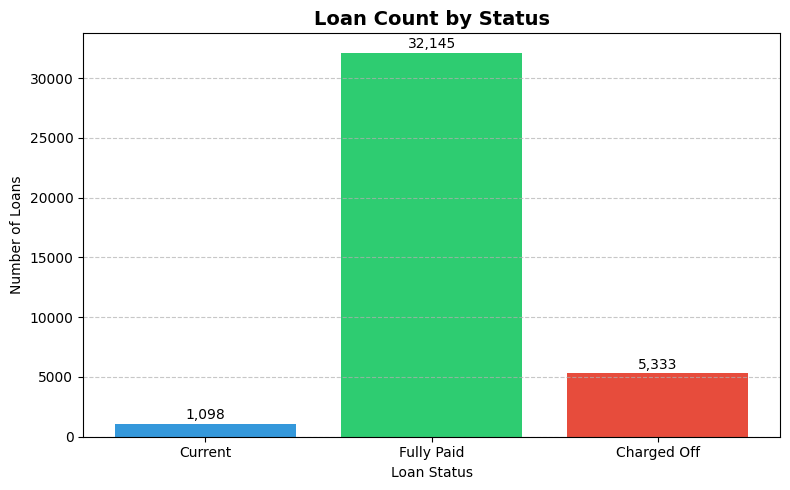

In [76]:
import matplotlib.pyplot as plt

# Selecting key loan statuses
target_statuses = ['Current', 'Fully Paid', 'Charged Off']

# Counting the number of loans in each status
status_counts = df[df['loan_status'].isin(target_statuses)]['loan_status'].value_counts().reindex(target_statuses)

# Bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(
    status_counts.index,
    status_counts.values,
    color=['#3498db', '#2ecc71', '#e74c3c']  # Blue, Green, Red
)

# Adding value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 100,  # Adjust for spacing
        f'{yval:,}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Formatting
plt.title('Loan Count by Status', fontsize=14, fontweight='bold')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Good vs. Bad Loan Pie Chart**

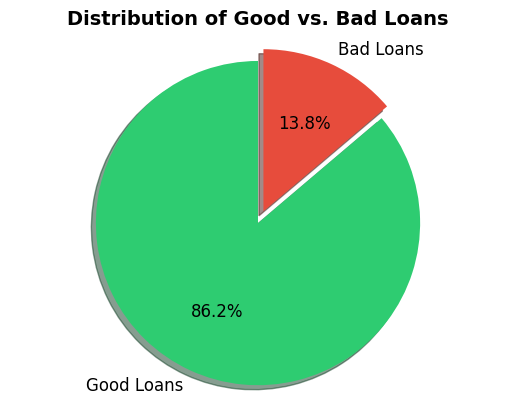

In [77]:

# Pie chart labels and sizes
labels = ['Good Loans', 'Bad Loans']
sizes = [float(good_loan_percentage), float(bad_loan_percentage)]

# Updated colors: green for good, red for bad
colors = ['#2ecc71', '#e74c3c']  # Soft green and deep red
explode = (0.08, 0)  # Slight explode on good loans

# Create pie chart
fig, ax = plt.subplots()
ax.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    textprops={'fontsize': 12}
)
ax.axis('equal')  # Equal aspect ratio for perfect circle

plt.title('Distribution of Good vs. Bad Loans', fontsize=14, fontweight='bold')
plt.show()


**Monthly Total Payment Trend (Millions)**

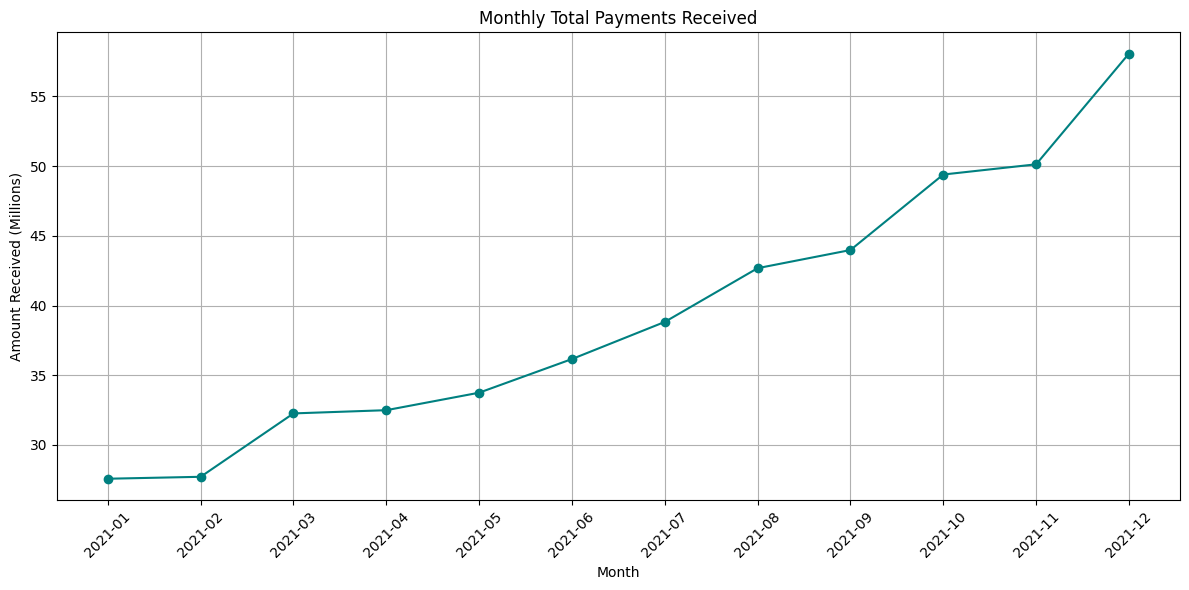

In [78]:
#Extracting year and month from issue_date
df['year_month'] = df['issue_date'].dt.to_period('M')

#Grouping by year-month and sum total payments
monthly_payment_sum = df.groupby('year_month')['total_payment'].sum()

#Converting to millions
monthly_payment_million = monthly_payment_sum / 1e6

#Plotting
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_payment_million.index.astype(str),
    monthly_payment_million.values,
    marker='o',
    linestyle='-',
    color='teal'
)

#Formatting the plot
plt.title('Monthly Total Payments Received')
plt.xlabel('Month')
plt.ylabel('Amount Received (Millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Total Payment Received by Employee Length**

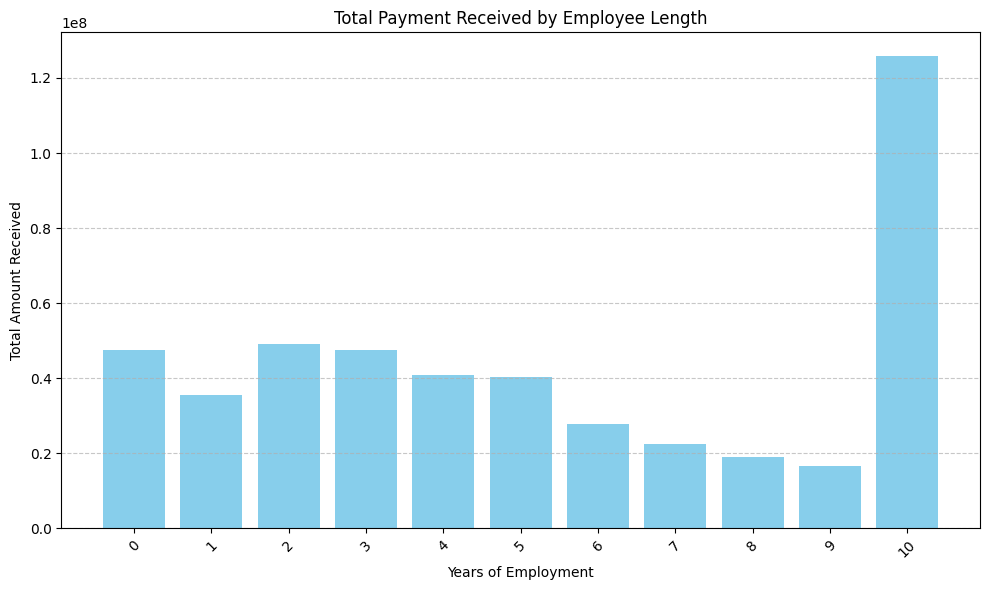

In [79]:
#Grouping by employee length and sum total payments
emp_length_payment = df.groupby('emp_length')['total_payment'].sum()

# Sorting by employee length (0–10 years)
emp_length_payment = emp_length_payment.sort_index()

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(
    emp_length_payment.index.astype(int).astype(str),
    emp_length_payment.values,
    color='skyblue'
)

# Add chart formatting
plt.title('Total Payment Received by Employee Length')
plt.xlabel('Years of Employment')
plt.ylabel('Total Amount Received')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Total Amount Received by Loan Purpose (with labels)**

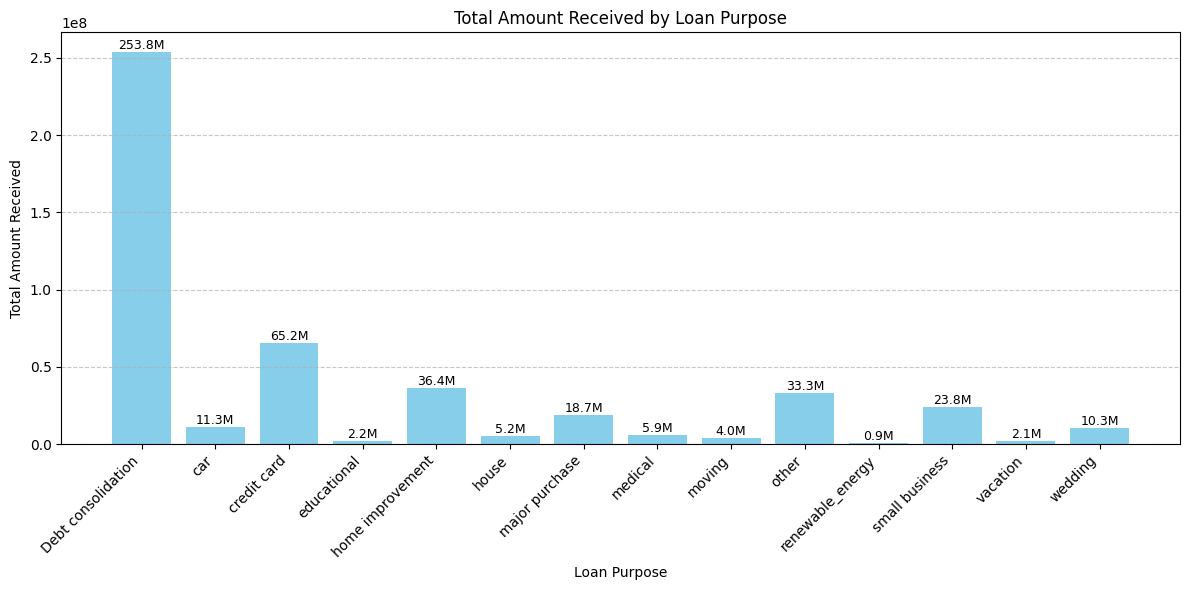

In [80]:

# Grouping total payments by loan purpose
purpose_payment = df.groupby('purpose')['total_payment'].sum()

# Sort alphabetically by purpose
purpose_payment = purpose_payment.sort_index()

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(
    purpose_payment.index.astype(str),
    purpose_payment.values,
    color='skyblue'
)

# Title and axes
plt.title('Total Amount Received by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Total Amount Received')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with value (in millions)
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval / 1e6:.1f}M',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


Average Payment Received per Loan Purpose

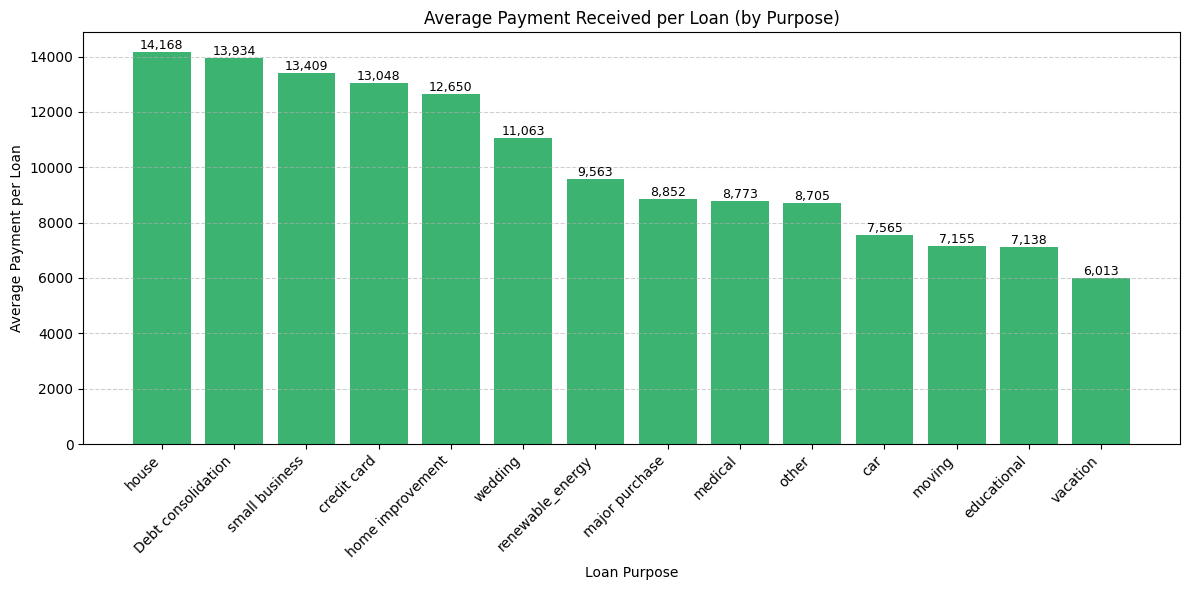

In [81]:
#Total payment by purpose
total_by_purpose = df.groupby('purpose')['total_payment'].sum()

#Number of loans by purpose
count_by_purpose = df['purpose'].value_counts().sort_index()

#Computing average payment per loan
avg_payment_per_purpose = total_by_purpose / count_by_purpose

#Sorting for better visual
avg_payment_per_purpose = avg_payment_per_purpose.sort_values(ascending=False)

#Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(
    avg_payment_per_purpose.index,
    avg_payment_per_purpose.values,
    color='mediumseagreen'
)

#Formatting
plt.title('Average Payment Received per Loan (by Purpose)')
plt.xlabel('Loan Purpose')
plt.ylabel('Average Payment per Loan')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:,.0f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()
